<a href="https://www.kaggle.com/code/vincentokumu/climate-change-modelling?scriptVersionId=222595034" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction 

Climate change remains one of the most pressing global challenges of the 21st century, often tied to the far-reaching consequences affecting ecosystems, weather patterns, and human societies. Among the key indicators of climate change have always been the increasing concentration of atmospheric carbon dioxide (CO₂), rising global average temperatures, sea level rise, and the shrinking extent of Arctic ice. These factors have often been linked, with changes in one aspect often hypothesized to drive or amplify changes in the others.

For instance, the rise in sea level is primarily hypothesized to be driven by two mechanisms: the thermal expansion of seawater as it warms and the addition of water from melting ice sheets and glaciers. Consequently, the rise in sea levels pose a major threat to coastal communities, increasing the risk of flooding, erosion, and habitat loss. Meanwhile, the Arctic region continues to experience dramatic reductions in ice coverage as a result, not only serving as a key indicator of global warming but also contributing to further temperature increase through reduced albedo (reflectivity), and amplifying the warming effect.

Given these hypothesized changes,and the data set at hand it would then be prudent to investigate the relationship between CO₂ concentration, global temperature, sea level rise, and Arctic ice area coverage. This analysis aims to test key hypotheses regarding the extent to which these factors are interconnected and the potential acceleration of climate change effects over time. By understanding these relationships, we can better assess the impacts of climate change and inform mitigation and adaptation strategies for the future.


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



# Data Import

In [2]:
#Load the dataframe 
df = pd.read_csv(r"/kaggle/input/climate-change-indicators/Climate_Change_Indicators.csv")
df.head()


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


# Sorting
Here we sort the data in ascending order so that the readings emulate those collected with the progression of time. 

In [3]:
#Sort data by year ascending
df = df.sort_values(by="Year",ascending=True)
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
114436,1900,13.31,393.73,87.77,12.11
706890,1900,14.91,404.57,206.58,3.76
443423,1900,13.79,317.52,173.26,4.73
443409,1900,14.40,299.28,265.74,4.15
320954,1900,14.28,350.52,226.14,10.77


You'll realize that the dataset contains several records per year. For instance, from the results returned above it is notable that in 1900, the global average temperature readings taken included (13.31, 14.91, 13.79, 14.40, 14.28 etc). Assumming that the readings are from different times of the same year and differents parts of the globe, our analysis will resort to averaging out the readings to come up with a representative reading for each year. 

In [4]:
#Calculates the mean reading for each year into a new data frame
df = df.groupby("Year").mean().reset_index()

#Select only numeric columns excluding year
numeric_cols = df.select_dtypes(include=["number"]).columns.drop("Year")
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


From averaging out the readings, the output above shows that, for instance, in 1900, the average global temperature was 14.506663 degrees, while the average CO2 concentration for the same year was 350.373405 ppm, and the sea level rise and arctic ice area were 150.408288 mm and 8.978659 million sq km respectively.

# Test for Normality

Before performing any analyses, perhaps it would be prudent to test the data that we have imported for normality. You may ask, "Is that any important?" Yes is is important for various reasons, especially since we intend to perform inferential analysis using the data set, and different statistical tests assume the data follows a normal distribution. 

**Why test for normality**

* ***Effect on Correlation and Regression*** – Since we intend to check the association between the variables, it's important to note tha normality affects how well correlation and regression models fit the data. Non-normal data may produce misleading correlation coefficients and biased regression estimates.

* ***Validity of Parametric Tests*** – Many inferential tests, such as t-tests, ANOVA, and linear regression, assume that the data (or residuals) are normally distributed. Violating this assumption can lead to incorrect conclusions.

* ***Accuracy of Confidence Intervals and p-values*** – If the data are not normal, confidence intervals and p-values in parametric tests may be inaccurate, leading to potential Type I (false positive) or Type II (false negative) errors.

**Normality Test using Shapiro-Wilk Test**

For this session, we are testing the data for normality using Shapiro-Wilk test, especially since we had already summarized the data to contain the mean readings for each year instead of the original repeated readings. Therefore, the resultant dataset contains records less than 5000.

In [5]:
#Testing for normality
def test_normality(data):
    results = {}
    for col in data.columns:
        stat, p_value = stats.shapiro(data[col]) #Shapiro-wilk test
        results[col] = {"statistics": stat, "p-value": p_value, "Normal": p_value > 0.05}

    return pd.DataFrame(results).T #Converts to data frame for easy viewing

With Shapiro-Wilk test, the hypothesis being tested is as follows:

**Null hypothesis (H0):** The data is normally distributed

**Alternative hypothesis (H1):** The data is not normally distributed

In cases where we fail to reject the null hypothesis (meaning the p_value is calculated to be greter than 0.05) the test statistic shows us how normal the data is. In such a case, values closer to 0 indicate the data is less normal and values closer to 1 indicate the data is more normally distributed.

In [6]:
#Run normality test on numeric columns
normality_results = test_normality(df[numeric_cols])
print(normality_results)

                                statistics   p-value Normal
Global Average Temperature (°C)   0.990661  0.570436   True
CO2 Concentration (ppm)            0.98428  0.160786   True
Sea Level Rise (mm)               0.980155  0.064994   True
Arctic Ice Area (million km²)      0.99406  0.883612   True


From the Shapiro-Wilk test results above, it is evident that the all variables are normally distributed as the respective p_values are greater than 0.05. Additionally, with each statistic closer to 1, it shows that the data are more normally distributed as will be proven by the following histogram plots.

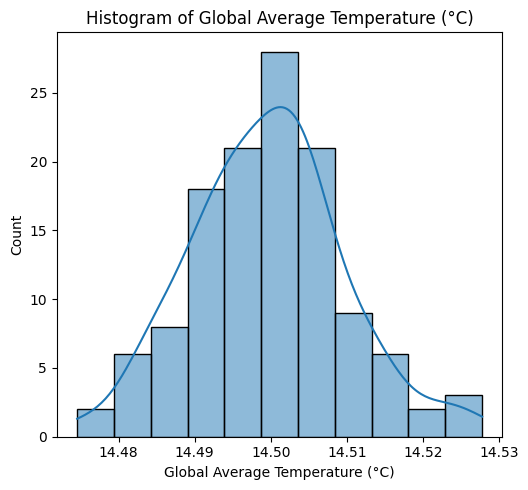

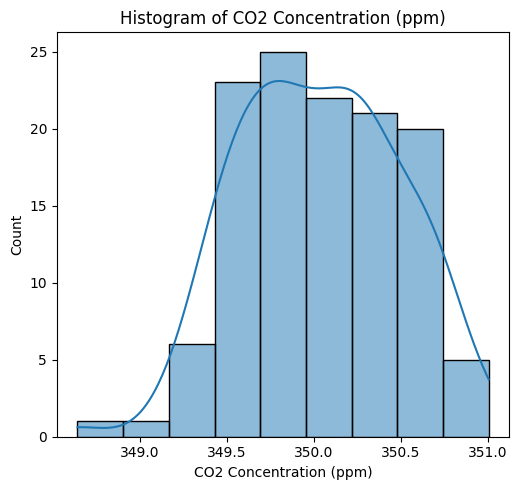

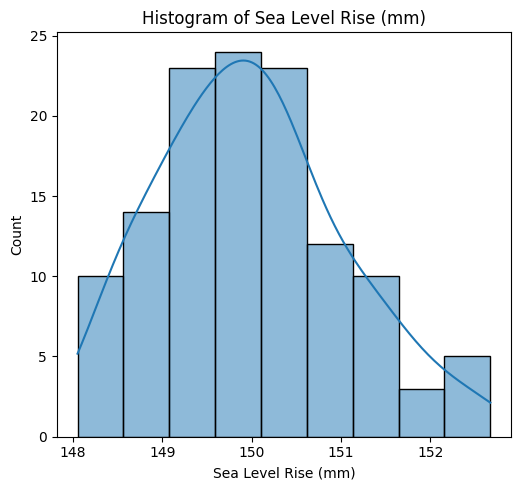

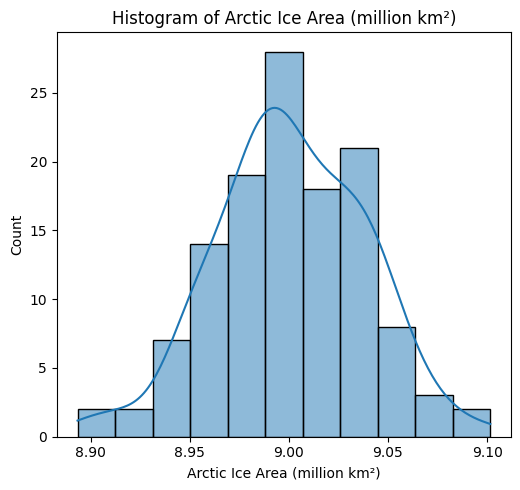

In [7]:
#Replace infinities with NaN
df.replace([np.inf,-np.inf], np.nan, inplace = True)

#Display results
for col in numeric_cols:
    plt.figure(figsize=(10,5))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True) #Drops NaN values
    plt.title(f"Histogram of {col}")

    plt.tight_layout()
    plt.show()

From the statistics above and the accompanying histograms, it is evident that all variable readings follow a normal distribution. This allows us to proceed with the next step of the analysis, estimating the correlation between the variables to see how they relate to the underlying hypothesis.

# Hypothesis Testing

Several hypotheses can be drawn and tested from the variables we have in the climate change dataset we are using. However, we will not test all of them. Instead, We will test the three most common ones we can draw, with the aim to perform data modelling later to project changes in climate in the future. The three hypotheses we will test are as follows:

* **H1:** If CO2 concentration increases over time, then the global average temperature will also rise due to the greenhouse effect.

* **H2:** If global temperatures increase, then Arctic ice will melt, leading to a decrease in arctic ice area cover. 

* **H3:** If global average temperatures increase, then global sea levels will rise due to thermal expansion of seawater and melting of glaciers and ice sheets.



In [8]:
#Renaming Columns
df = df.rename(columns = {
    "CO2 Concentration (ppm)": "CO2_Conc",
    "Global Average Temperature (°C)": "Avg_Temp",
    "Sea Level Rise (mm)": "Sea_Lvl",
    "Arctic Ice Area (million km²)": "Ice_Area"
})
df.head()

,Year,Avg_Temp,CO2_Conc,Sea_Lvl,Ice_Area
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


**Hypothesis 1: CO2 Concentration vs Global Average Temperature**

Here we will test the hypothesis that an increase in CO2 concentration leads to a rise in global average temperature. The hypothesis will therefore be defined as follows:

**Null Hypothesis (Ho):** There is no significant correlation between CO2 concentration and Average global temperature

**Alternative Hypothesis (H1):** There is a significant positive correlation between CO2 concentration and Average global temperature

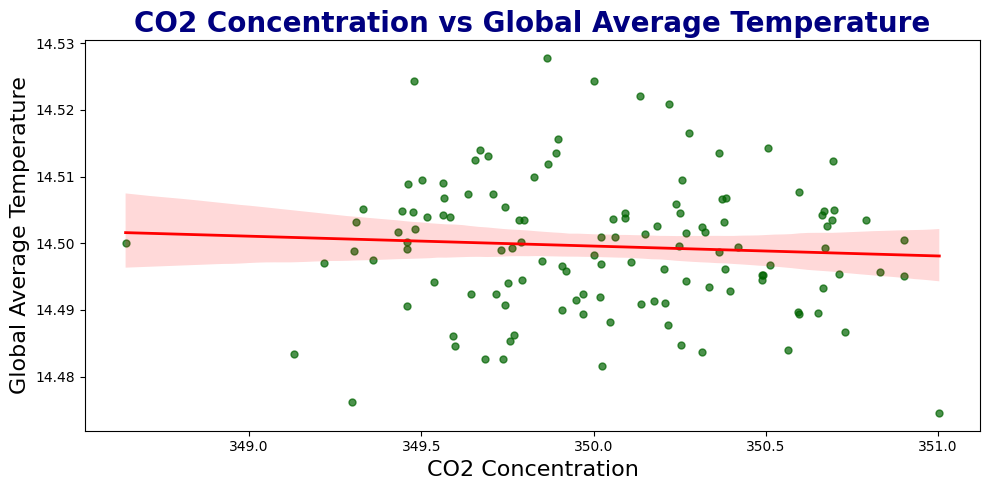

In [9]:
#Scatterplot with regression line
plt.figure(figsize = (10,5)) #Sets the figure size
sns.set_style = ("dark")

#Creating scatterplot with regression line
ax = sns.regplot(
    x = df['CO2_Conc'], 
    y = df['Avg_Temp'],
    scatter_kws = {'s': 25,'color':'darkgreen', 'alpha': 0.7}, 
    line_kws = {'linewidth':2, 'color':'red'})

#Setting plot title and axis labels                 
ax.set_title("CO2 Concentration vs Global Average Temperature", 
             fontsize = 20, fontweight = 'bold', color= 'navy')
ax.set_xlabel("CO2 Concentration", fontsize = 16)
ax.set_ylabel("Global Average Temperature", fontsize = 16)
                 
#Adjust Layout
plt.tight_layout()
plt.show()   

In [10]:
from scipy.stats import pearsonr
r, p_value = pearsonr(df['CO2_Conc'],df['Avg_Temp'])
print(f"Pearson correlation coefficient: {r:.4f}")
print(f"p_value: {p_value:.4f}")

#Interpretation
alpha = 0.05 #Significance level
if p_value < alpha:
    print("Reject null hypothesis: CO2 concentration is significantly positively correlated with Global average temperature")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between CO2 concentration and Global average temperature")
    

Pearson correlation coefficient: -0.0680
p_value: 0.4531
Fail to reject the null hypothesis: There is no significant correlation between CO2 concentration and Global average temperature


**Hypothesis 2: Global Average Temp vs Rise in Sea Level**

Here we test the hypothesis that an increase in temperature will lead to a rise in sea level, with the hypothesis defined as below:

**Null hypothesis (Ho):** There is no significant correlation between global average temperature and rise in sea level

**Alternative Hypothesis (H1):** There is a significant positive correlation between global average temperature and sea level


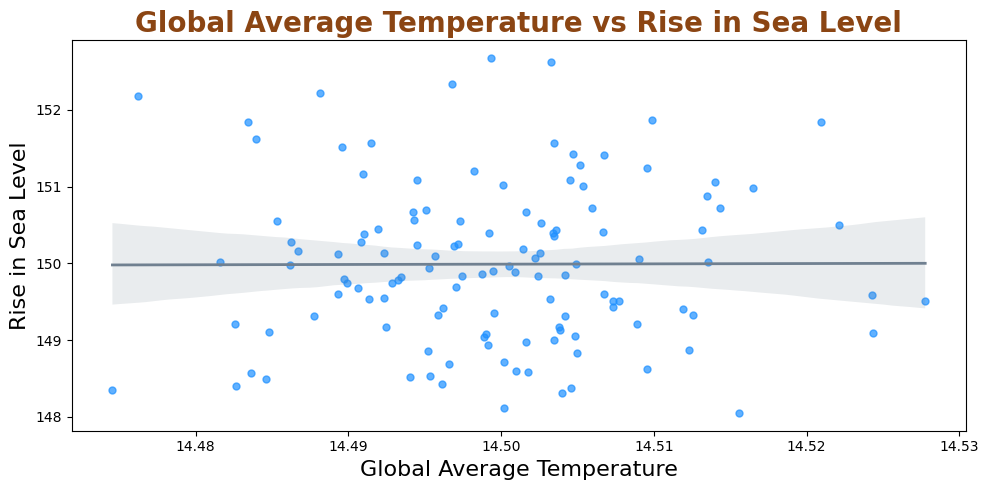

In [11]:
#Scatterplot with regression line
plt.figure(figsize = (10,5)) #Sets the figure size
sns.set_style = ("dark")

#Creating scatterplot with regression line
ax = sns.regplot(
    x = df['Avg_Temp'], 
    y = df['Sea_Lvl'],
    scatter_kws = {'s': 25,'color':'dodgerblue', 'alpha': 0.7}, 
    line_kws = {'linewidth':2, 'color':'slategrey'})

#Setting plot title and axis labels                 
ax.set_title("Global Average Temperature vs Rise in Sea Level", 
             fontsize = 20, fontweight = 'bold', color= 'saddlebrown')
ax.set_xlabel("Global Average Temperature", fontsize = 16)
ax.set_ylabel("Rise in Sea Level", fontsize = 16)
                 
#Adjust Layout
plt.tight_layout()
plt.show()                 

In [12]:
from scipy.stats import pearsonr
r, p_value = pearsonr(df['Avg_Temp'],df['Sea_Lvl'])
print(f"Pearson correlation coefficient: {r:.4f}")
print(f"p_value: {p_value:.4f}")

#Interpretation
alpha = 0.05 #Significance level
if p_value < alpha:
    print("Reject null hypothesis: Global average temperature is significantly positively correlated with Sea level")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between Global average temperature and Sea level")
   

Pearson correlation coefficient: 0.0039
p_value: 0.9659
Fail to reject the null hypothesis: There is no significant correlation between Global average temperature and Sea level


**Hypothesis 3**

Here we test the hypothesis that an increase in global average temperature leads to a decrease in Arctic ice area, so the hypothesis is defined as:

**Null hypothesis (Ho):** There is no significant correlation between global average temperature and arctic ice area.

**Alternative hypothesis (H1):** There is a significant negative correlation between global average temperature and arctic ice area

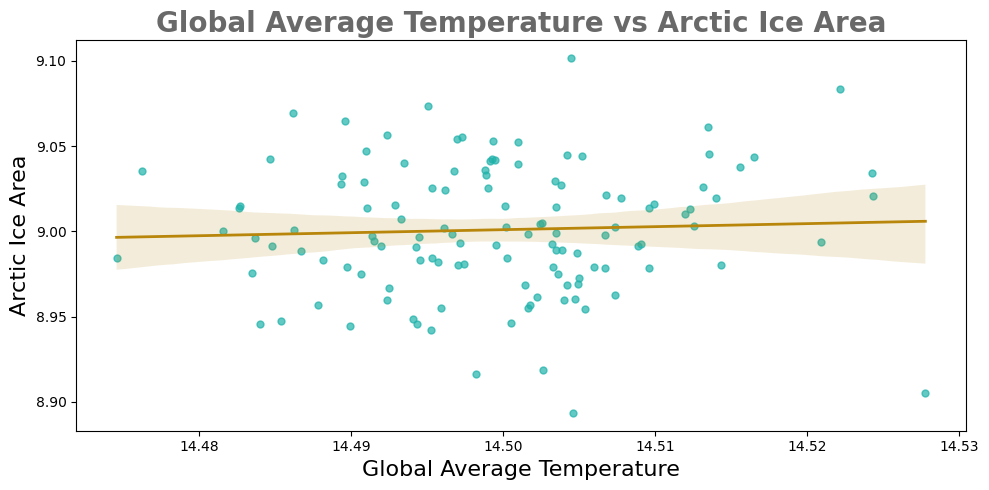

In [13]:
#Scatterplot with regression line
plt.figure(figsize = (10,5)) #Sets the figure size
sns.set_style = ("dark")

#Creating scatterplot with regression line
ax = sns.regplot(
    x = df['Avg_Temp'], 
    y = df['Ice_Area'],
    scatter_kws = {'s': 25,'color':'lightseagreen', 'alpha': 0.7}, 
    line_kws = {'linewidth':2, 'color':'darkgoldenrod'})

#Setting plot title and axis labels                 
ax.set_title("Global Average Temperature vs Arctic Ice Area", 
             fontsize = 20, fontweight = 'bold', color= 'dimgrey')
ax.set_xlabel("Global Average Temperature", fontsize = 16)
ax.set_ylabel("Arctic Ice Area", fontsize = 16)
                 
#Adjust Layout
plt.tight_layout()
plt.show()    

In [14]:
from scipy.stats import pearsonr
r, p_value = pearsonr(df['Avg_Temp'],df['Ice_Area'])
print(f"Pearson correlation coefficient: {r:.4f}")
print(f"p_value: {p_value:.4f}")

#Interpretation
alpha = 0.05 #Significance level
if p_value < alpha:
    print("Reject null hypothesis: Global average temperature is significantly negatively correlated with Arctic ice area ")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between Global average temperature and Arctic ice area")
   

Pearson correlation coefficient: 0.0470
p_value: 0.6040
Fail to reject the null hypothesis: There is no significant correlation between Global average temperature and Arctic ice area


# Conclusion 

From the analysis above, it would be accurate to deduce there is no significant linear correlation determined between CO2 concentration and Global average temperature. Neither is there a significant linear correlation between Global average temperature and Sea level or Arctic area. The statistics lead to the possibility of the correlation earlier identified to have happened by chance. It would, therefore, not be helpful to continue forther with further data modelling knowing the variables do not directly associate. 

*If you liked the above analysis, please feel free to upvote the content and I'll see you on the next one. Cheers!!*  